In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
####1. Make a list of categorical and numerical columns in the data.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [11]:
num = df.select_dtypes(exclude='O').columns.to_list()
cat = df.select_dtypes(include='O').columns.to_list()


In [12]:
num

['total_bill', 'tip', 'size']

In [13]:
cat

['sex', 'smoker', 'day', 'time']

In [14]:
###2. Compute the average bill amount for each day.

df.groupby('day')['total_bill'].mean()



day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [18]:
# 3. Which gender is more generous in giving tips?

df.groupby('sex')['tip'].mean()


sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

In [16]:
# Males are more generous in giving tips


In [32]:
# 4. According to the data, were there more customers for dinner or lunch?

df.groupby('time')['size'].count().idxmax()


'Dinner'

In [ ]:
###More customer are for Dinner.

In [19]:
# 5. Based on the statistical summary, comment on the variable 'tip'

df.describe()


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [20]:
# 6. Find the busiest day in terms of the orders?

df.day.mode()


0    Sat
Name: day, dtype: object

In [ ]:
# Busiest day in terms of orders is Saturday


In [21]:
# 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

df.total_bill.skew()


1.1332130376158205

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

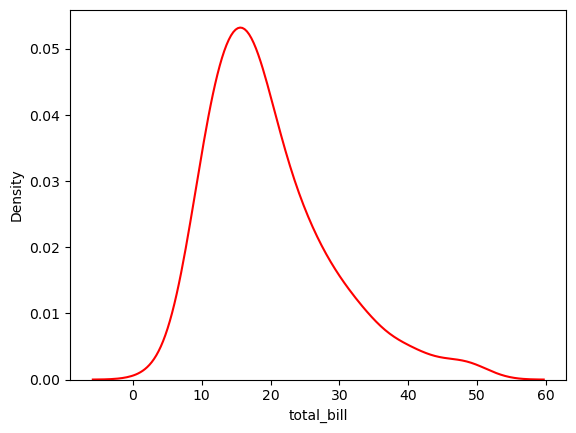

In [22]:
sns.distplot(df['total_bill'],
             hist=False, color='red')

In [23]:
# As per the above observations the total_bill data is postively skewed.


In [24]:
# 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot
# and metric and write your findings.

df[['total_bill', 'tip']].corr()


,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


In [25]:
df[['total_bill', 'tip']].corr()


,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


<AxesSubplot:>

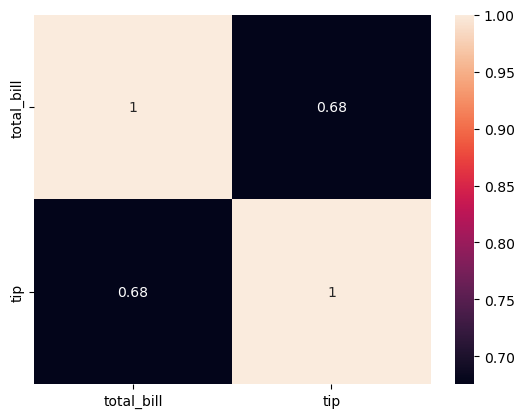

In [27]:
sns.heatmap(df[['total_bill', 'tip']].corr(), annot=True)


In [28]:
# The tip amount is dependent on total_bill and tip increases with the increase in total_bill. 


In [30]:
## ### 9. What is the percentage of males and females in the dataset? and display it in the plot

df['sex'].value_counts(normalize=True)*100


Male      64.344262
Female    35.655738
Name: sex, dtype: float64

([<matplotlib.patches.Wedge at 0x27df768bc10>,
 [Text(-0.47909423581850497, 0.9901862012800839, 'Male'),
  Text(0.4790942358185044, -0.9901862012800842, 'Female')],
 [Text(-0.2613241286282754, 0.5401015643345912, '64.3%'),
  Text(0.2613241286282751, -0.5401015643345913, '35.7%')])

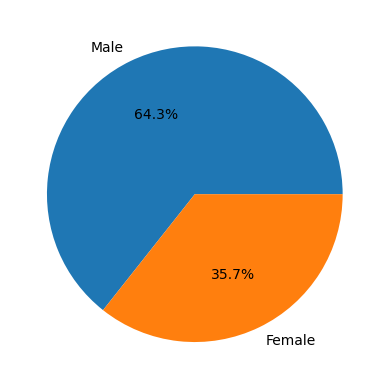

In [33]:
plt.pie(df.sex.value_counts(), autopct = '%.1f%%', labels=['Male', 'Female'])


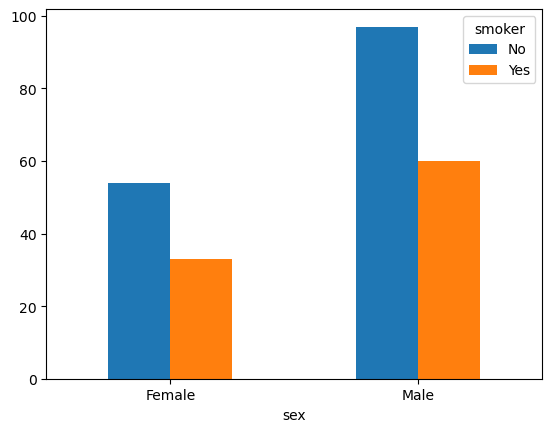

In [35]:
### 10. Compute the gender-wise count based on smoking habits and display it in the plot

gender=df['sex']
smoker=df['smoker']
crosstb=pd.crosstab(gender,smoker)
barplot = crosstb.plot.bar(rot=0)



Text(0, 0.5, 'Average tip')

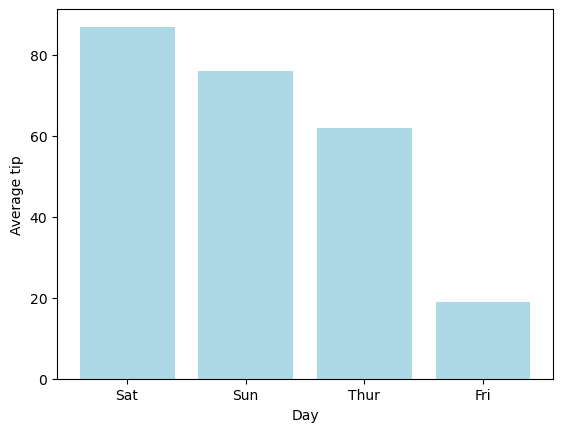

In [37]:
### 11. Compute the average tip amount given for different days and display it in the plot.

average=df.day.value_counts()
plt.bar(average.index, average.values, color='lightblue')
plt.xlabel('Day')
plt.ylabel('Average tip')

<AxesSubplot:>

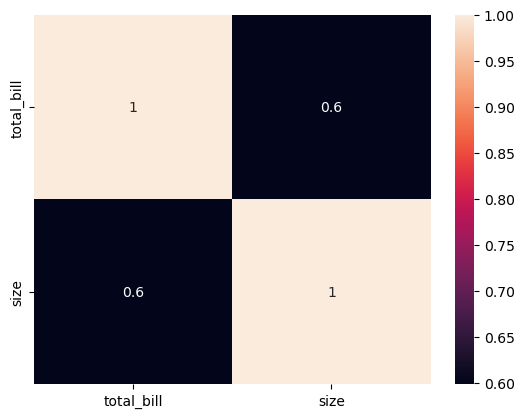

In [38]:
#12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

sns.heatmap(df[['total_bill', 'size']].corr(), annot=True)


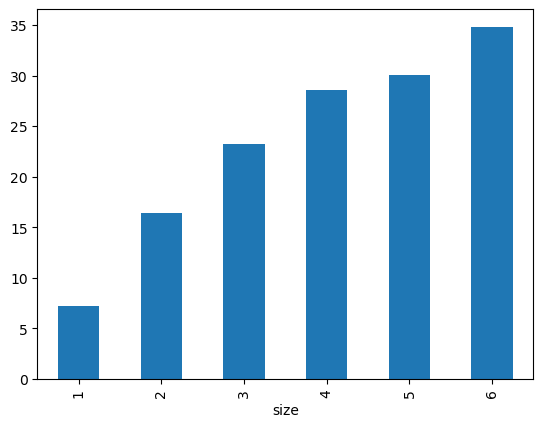

In [39]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

In [ ]:
# total_bill increases with the increase in size.


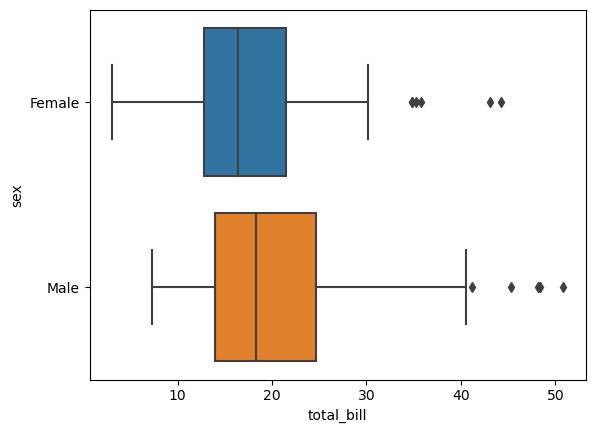

In [40]:
#13. Plot a horizontal boxplot to compare the bill amount based on gender

sns.boxplot(x='total_bill',y='sex',data=df)
plt.show()



In [41]:
#14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

df_x=df.groupby(['time','day'],as_index=False)['total_bill'].max()
df_x[(df_x['day']=='Sat')|(df_x['day']=='Sun')]


,time,day,total_bill
1,Dinner,Sat,50.81
2,Dinner,Sun,48.17


In [ ]:
df.groupby('size')['total_bill'].mean().plot(kind='bar')

In [42]:
### 15. Compute the percentage of missing values in the dataset.

df.isnull().sum()/len(df)


total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [43]:
### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

len(df[df.duplicated()])


1

In [45]:
df.drop_duplicates(inplace=True)

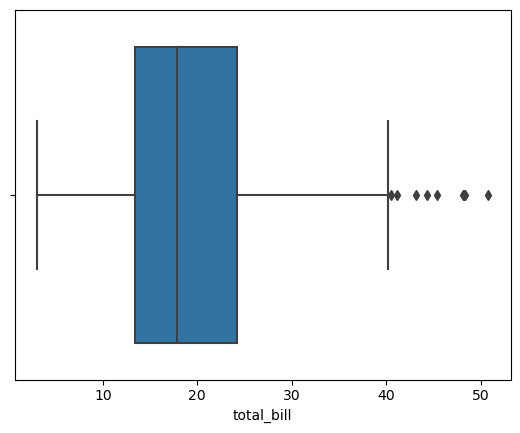

In [46]:
### 17. Is there are any outliers present in the column 'total_bill'? 
##If yes treat them with transformation approach, and plot a boxplot before and after the treatment

sns.boxplot(df['total_bill'])
plt.show()


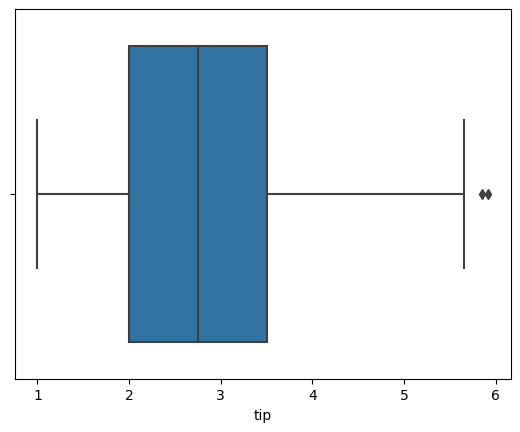

In [47]:
### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)
IQR = Q3-Q1

lower_whisker=Q1-(1.5*IQR)
upper_whisker=Q3+(1.5*IQR)

df_out=df.loc[(df['tip']<upper_whisker)&(df['tip']>lower_whisker)]

sns.boxplot(df_out['tip'])
plt.show()





In [48]:
### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

df=pd.get_dummies(df, drop_first=True)
df.sample(5)

,total_bill,tip,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
204,20.53,4.00,4,1,1,0,0,1,1
87,18.28,4.00,2,1,0,0,0,1,1
174,16.82,4.00,2,1,1,0,1,0,0
108,18.24,3.76,2,1,0,1,0,0,0
19,20.65,3.35,3,1,0,1,0,0,0


In [ ]:
### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

tb_max = df['total_bill'].max()
tb_min = df['total_bill'].min()
range_ = tb_max-tb_min
print(range_)